PDF 파일을 PNG로 변환 및 세로로 나누는 작업 완료! 변환된 파일은 C:/Users/user/Downloads/qcrop/original/converted_images에 저장되었습니다.
x_target is dynamically set to: 48


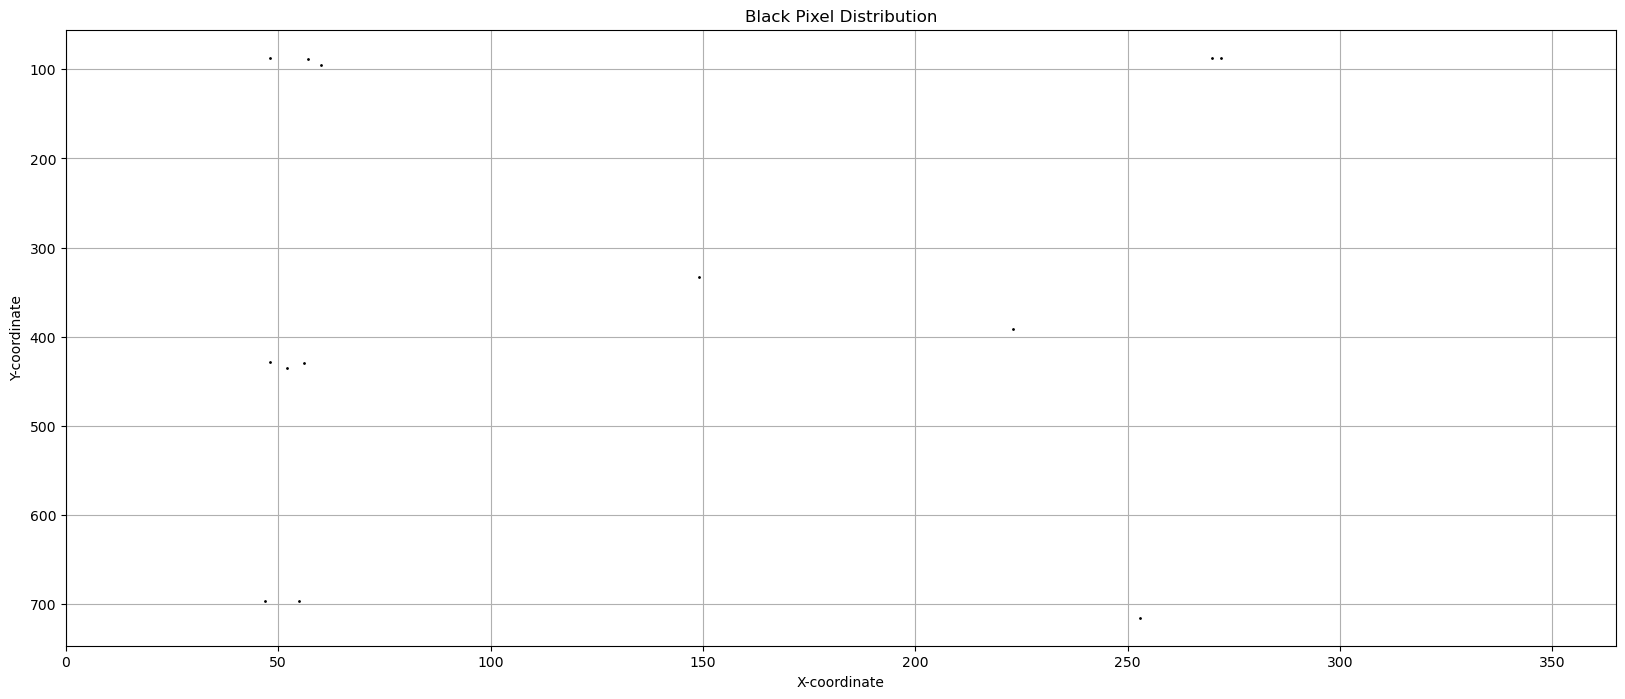

49


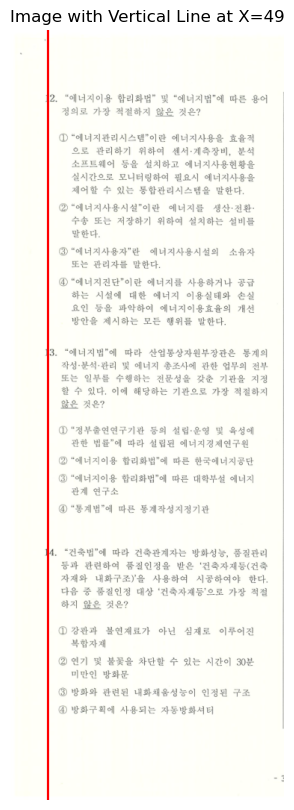

Detected (x, y) coordinates: [(49, 86), (49, 96), (49, 428), (49, 703)]


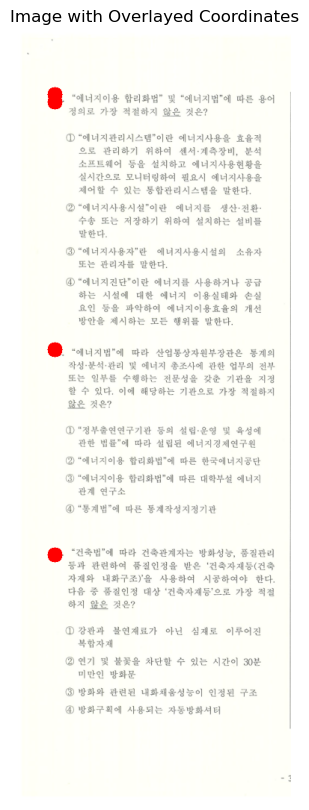

Skipping crop region with insufficient height: (29, 76, 365, 86)
Cropped image saved: cropped_images\cropped_2.png


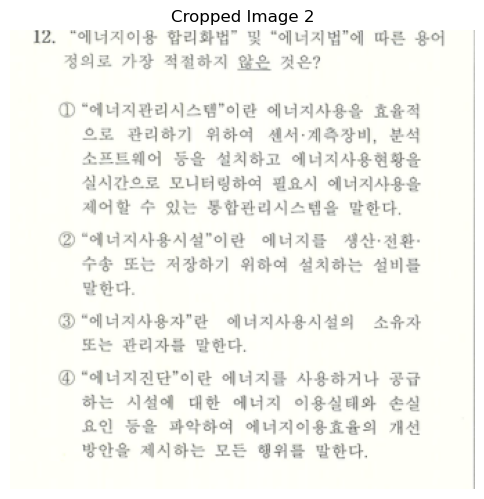

Cropped image saved: cropped_images\cropped_3.png


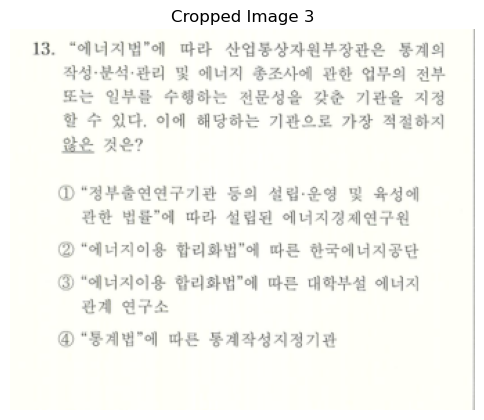

Cropped image saved: cropped_images\cropped_4.png


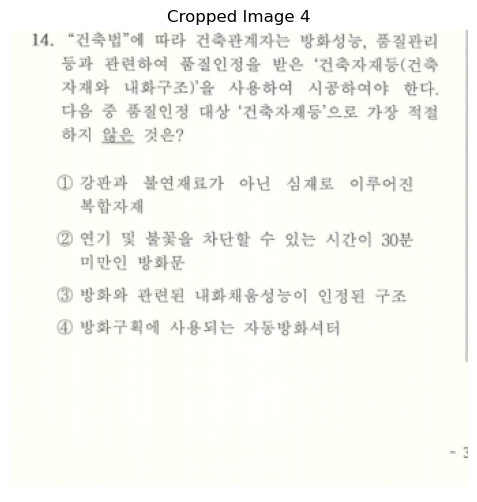

In [69]:

image_path = "C:/Users/user/Downloads/qcrop/original/converted_images/2023_pil_B_page_3_left.png"


#
# 이미지 변환 및 나누기 pdf to png + Division
#
import os
import fitz  # PyMuPDF
from PIL import Image

# PDF 경로 설정
pdf_path = "C:/Users/user/Downloads/qcrop/original/"
output_path = os.path.join(pdf_path, "converted_images")

# 출력 폴더 생성
os.makedirs(output_path, exist_ok=True)

# PDF 파일 목록 가져오기
pdf_files = [f for f in os.listdir(pdf_path) if f.endswith('.pdf')]

# PDF의 각 페이지를 세로 방향으로 절반 나누어 저장하는 함수
def convert_and_split_pdf_to_png(pdf_file, output_dir):
    pdf_document = fitz.open(pdf_file)
    for page_num in range(len(pdf_document)):
        page = pdf_document.load_page(page_num)
        pix = page.get_pixmap()

        # PIL 이미지를 사용해 세로로 나눔
        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        mid_x = pix.width // 2

        left_img = img.crop((0, 0, mid_x, pix.height))
        right_img = img.crop((mid_x, 0, pix.width, pix.height))

        base_filename = f"{os.path.splitext(os.path.basename(pdf_file))[0]}_page_{page_num + 1}"
        left_img.save(os.path.join(output_dir, f"{base_filename}_left.png"))
        right_img.save(os.path.join(output_dir, f"{base_filename}_right.png"))
    pdf_document.close()

# 변환 및 저장 실행
for pdf_file in pdf_files:
    pdf_full_path = os.path.join(pdf_path, pdf_file)
    convert_and_split_pdf_to_png(pdf_full_path, output_path)

print(f"PDF 파일을 PNG로 변환 및 세로로 나누는 작업 완료! 변환된 파일은 {output_path}에 저장되었습니다.")









#
#x타겟값 설정
#
import cv2
import matplotlib.pyplot as plt
import numpy as np


def analyze_black_pixel_distribution(image_path, threshold=100, skip=60):
    """
    Analyze black pixel distribution across all vertical lines (x-coordinates) of the image.

    Parameters:
        image_path (str): Path to the input image file.
        threshold (int): The intensity threshold to detect dark pixels.
        skip (int): Number of pixels to skip after detecting a dark pixel.

    Returns:
        dict: Dictionary where keys are x-coordinates, and values are lists of detected y-coordinates.
    """
    # Load the image in grayscale for intensity analysis
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Failed to load image.")
        return {}

    # Get image dimensions
    height, width = image.shape

    # Initialize dictionary to store results
    black_pixel_distribution = {}

    # Analyze each vertical line (x-coordinate)
    for x in range(width):
        # Extract the pixel intensities along the y-axis at x
        vertical_line = image[:, x]
        y = 0  # Start from the top of the image
        y_coordinates = []  # List to store y-coordinates for this x

        while y < height:
            if vertical_line[y] < threshold:
                # Dark pixel detected
                y_coordinates.append(y)
                # Skip the next `skip` pixels
                y += skip
            else:
                # Move to the next pixel
                y += 1

        # Store detected y-coordinates for this x-coordinate
        if y_coordinates:
            black_pixel_distribution[x] = y_coordinates

    return black_pixel_distribution


def calculate_black_pixel_count(distribution):
    """
    Calculate the number of black pixels for each x-coordinate.

    Parameters:
        distribution (dict): Dictionary where keys are x-coordinates and values are lists of y-coordinates.

    Returns:
        dict: Dictionary where keys are x-coordinates and values are the count of black pixels.
    """
    black_pixel_count = {x: len(y_coords) for x, y_coords in distribution.items()}
    return black_pixel_count


def find_x_target(pixel_counts, min_count=1, max_count=10):
    """
    Find the first x-coordinate where the black pixel count is within a specified range.

    Parameters:
        pixel_counts (dict): Dictionary where keys are x-coordinates and values are the count of black pixels.
        min_count (int): Minimum black pixel count.
        max_count (int): Maximum black pixel count.

    Returns:
        int: The first x-coordinate satisfying the condition, or -1 if not found.
    """
    for x, count in pixel_counts.items():
        if min_count <= count <= max_count:
            return x
    return -1


# Example usage

threshold = 100  # Intensity threshold for detecting dark pixels
skip = 20  # Number of pixels to skip after detection

# Analyze the image for black pixel distribution
black_pixel_distribution = analyze_black_pixel_distribution(image_path, threshold, skip)

# Calculate black pixel counts for each x-coordinate
black_pixel_count = calculate_black_pixel_count(black_pixel_distribution)

# Find the first x-coordinate satisfying the condition
x_target = find_x_target(black_pixel_count, min_count=2, max_count=10)

if x_target != -1:
    print(f"x_target is dynamically set to: {x_target}")
else:
    print("No x-coordinate satisfies the condition.")

# Plot the distribution
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is not None:
    plot_black_pixel_distribution(black_pixel_distribution, image.shape[1])
x_target+=1
print(x_target)


#
# x target 값 이미지 상 위치 확인
#


import cv2
import matplotlib.pyplot as plt

def overlay_x_line(image_path, x_target, output_path="output_with_x_line.png"):
    """
    Overlay a vertical line at a specific x-coordinate on the image.

    Parameters:
        image_path (str): Path to the input image file.
        x_target (int): The x-coordinate where the line will be overlaid.
        output_path (str): Path to save the output image with the overlay.

    Returns:
        None
    """
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        print("Failed to load image.")
        return

    # Add a vertical line at x_target (BGR color: red)
    line_color = (0, 0, 255)  # Red color in BGR
    line_thickness = 2
    image_with_line = cv2.line(image, (x_target, 0), (x_target, image.shape[0]), line_color, line_thickness)

    # Save the output image with the overlay
    cv2.imwrite(output_path, image_with_line)

    # Display the image with the overlay
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image_with_line, cv2.COLOR_BGR2RGB))
    plt.title(f"Image with Vertical Line at X={x_target}")
    plt.axis("off")
    plt.show()

# Example usage
overlay_x_line(image_path, x_target)


#
# 실제 좌표값 찍음
#

def analyze_and_store_coordinates(image_path, x_target, threshold=100, skip=5, min_distance=10):
    """
    Analyze pixels along the y-axis for a given x-coordinate in an image,
    storing detected coordinates after skipping a defined number of pixels.

    Parameters:
        image_path (str): Path to the input image file.
        x_target (int): The x-coordinate to analyze.
        threshold (int): The intensity threshold to detect dark pixels.
        skip (int): Number of pixels to skip after detecting a dark pixel.
        min_distance (int): Minimum distance between detected points to treat them as separate.

    Returns:
        list: Detected (x, y) coordinates of dark pixels.
    """
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale for intensity analysis
    if image is None:
        print("Failed to load image.")
        return []

    # Extract the pixel intensities along the y-axis at x_target
    vertical_line = image[:, x_target]

    # Initialize variables
    coordinates = []  # List to store detected (x, y) positions
    last_y = -min_distance  # Track the last detected y-coordinate

    for y, pixel_value in enumerate(vertical_line):
        if pixel_value < threshold:
            # Check minimum distance to avoid detecting very close points
            if y - last_y >= min_distance:
                coordinates.append((x_target, y))
                last_y = y

    return coordinates

def overlay_coordinates(image_path, coordinates, output_path="output_with_coordinates.png"):
    """
    Overlay specified coordinates on the image.

    Parameters:
        image_path (str): Path to the input image file.
        coordinates (list of tuples): List of (x, y) coordinates to overlay.
        output_path (str): Path to save the output image with the overlay.

    Returns:
        None
    """
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        print("Failed to load image.")
        return

    # Overlay each coordinate as a circle on the image
    for (x, y) in coordinates:
        # Draw a circle at each (x, y) coordinate (BGR color: red)
        circle_color = (0, 0, 255)  # Red color in BGR
        circle_radius = 10
        circle_thickness = -1  # Filled circle
        cv2.circle(image, (x, y), circle_radius, circle_color, circle_thickness)

    # Save the output image with the overlay
    cv2.imwrite(output_path, image)

    # Display the image with the overlay
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Image with Overlayed Coordinates")
    plt.axis("off")
    plt.show()

# Example usage
####검정색 인식 변수수
threshold = 250  # Intensity threshold for detecting dark pixels
skip = 5  # Reduced skip to ensure closer points are analyzed
min_distance = 10  # Minimum distance between points

# Analyze the image and store the detected coordinates
coordinates = analyze_and_store_coordinates(image_path, x_target, threshold, skip, min_distance)

# Print detected coordinates
print("Detected (x, y) coordinates:", coordinates)

# Overlay the detected coordinates on the image
overlay_coordinates(image_path, coordinates)


#
# 문제 크롭 실행행
#

import cv2
import os
import matplotlib.pyplot as plt

def crop_image_by_coordinates(image_path, coordinates, output_folder="cropped_images"):
    """
    Crop the image based on a list of coordinates and save the cropped parts,
    while also displaying the cropped images.

    Parameters:
        image_path (str): Path to the input image file.
        coordinates (list of tuples): List of (x, y) coordinates for cropping.
        output_folder (str): Folder to save the cropped images.

    Returns:
        None
    """
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        print("Failed to load image.")
        return

    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Get image dimensions
    height, width, _ = image.shape

    # Process each coordinate and crop the image
    for i, (x, y) in enumerate(coordinates):
        # Determine the cropping box
        x_start = x  # Crop from the x-coordinate
        y_start = y  # Crop from the y-coordinate
        x_end = width  # Always crop to the full width
        y_end = height if i == len(coordinates) - 1 else coordinates[i + 1][1]  # Next y or full height

        # Ensure cropping coordinates are within image boundaries
        x_start = max(0, min(x_start, width))
        x_end = max(0, min(x_end, width))
        y_start = max(0, min(y_start, height))
        y_end = max(0, min(y_end, height))

        # Check if the cropping box is valid and meets the height condition
        crop_height = y_end - y_start
        if y_start >= y_end or x_start >= x_end:
            print(f"Skipping invalid crop region: ({x_start}, {y_start}, {x_end}, {y_end})")
            continue
        if crop_height < 100:  # Add the height condition
            print(f"Skipping crop region with insufficient height: ({x_start}, {y_start}, {x_end}, {y_end})")
            continue

        # Crop the image
        cropped_image = image[y_start:y_end, x_start:x_end]

        # Save the cropped image
        output_path = os.path.join(output_folder, f"cropped_{i + 1}.png")
        cv2.imwrite(output_path, cropped_image)

        print(f"Cropped image saved: {output_path}")

        # Display the cropped image
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Cropped Image {i + 1}")
        plt.axis("off")
        plt.show()


def modify_coordinates(coordinates):
    return [(x - 20, y - 10) for x, y in coordinates]

# Example usage
new_coordinates = modify_coordinates(coordinates)
crop_image_by_coordinates(image_path, new_coordinates)













오른쪽 기준!

x_target is dynamically set to: 318


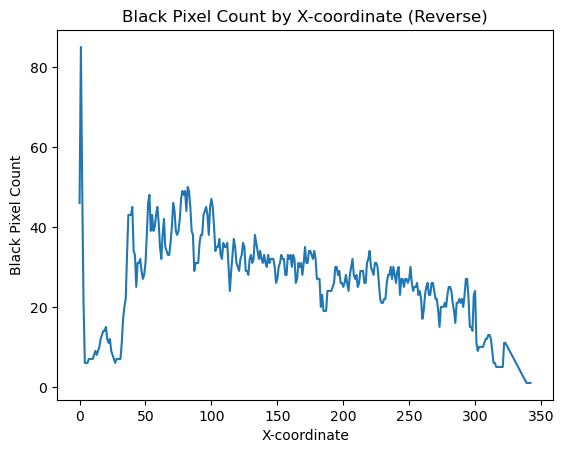

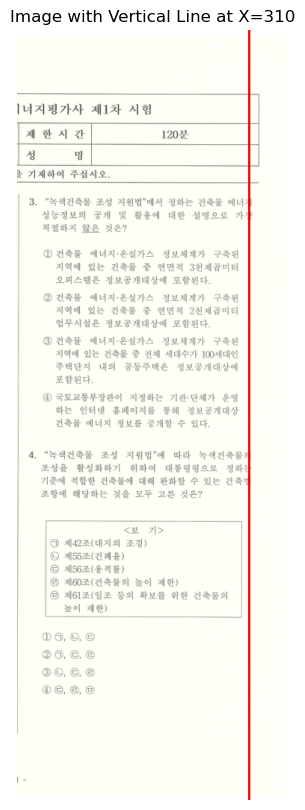

Detected (x, y) coordinates: [(310, 84), (310, 124), (310, 153), (310, 180), (310, 204), (310, 226), (310, 243), (310, 253), (310, 564), (310, 574), (310, 584), (310, 599), (310, 609)]


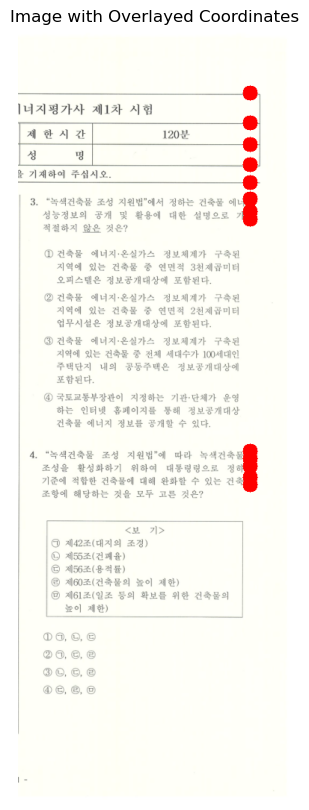

Skipping crop region with insufficient height: (290, 74, 365, 114)
Skipping crop region with insufficient height: (290, 114, 365, 143)
Skipping crop region with insufficient height: (290, 143, 365, 170)
Skipping crop region with insufficient height: (290, 170, 365, 194)
Skipping crop region with insufficient height: (290, 194, 365, 216)
Skipping crop region with insufficient height: (290, 216, 365, 233)
Skipping crop region with insufficient height: (290, 233, 365, 243)
Cropped image saved: cropped_images\cropped_8.png


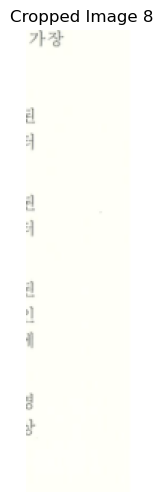

Skipping crop region with insufficient height: (290, 554, 365, 564)
Skipping crop region with insufficient height: (290, 564, 365, 574)
Skipping crop region with insufficient height: (290, 574, 365, 589)
Skipping crop region with insufficient height: (290, 589, 365, 599)
Cropped image saved: cropped_images\cropped_13.png


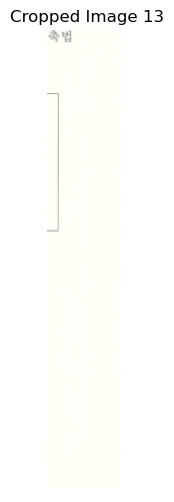

In [84]:

image_path = "C:/Users/user/Downloads/qcrop/original/converted_images/2023_pil_B_page_1_right.png"


# #
# # 이미지 변환 및 나누기 pdf to png + Division
# #
# import os
# import fitz  # PyMuPDF
# from PIL import Image

# # PDF 경로 설정
# pdf_path = "C:/Users/user/Downloads/qcrop/original/"
# output_path = os.path.join(pdf_path, "converted_images")

# # 출력 폴더 생성
# os.makedirs(output_path, exist_ok=True)

# # PDF 파일 목록 가져오기
# pdf_files = [f for f in os.listdir(pdf_path) if f.endswith('.pdf')]

# # PDF의 각 페이지를 세로 방향으로 절반 나누어 저장하는 함수
# def convert_and_split_pdf_to_png(pdf_file, output_dir):
#     pdf_document = fitz.open(pdf_file)
#     for page_num in range(len(pdf_document)):
#         page = pdf_document.load_page(page_num)
#         pix = page.get_pixmap()

#         # PIL 이미지를 사용해 세로로 나눔
#         img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
#         mid_x = pix.width // 2

#         left_img = img.crop((0, 0, mid_x, pix.height))
#         right_img = img.crop((mid_x, 0, pix.width, pix.height))

#         base_filename = f"{os.path.splitext(os.path.basename(pdf_file))[0]}_page_{page_num + 1}"
#         left_img.save(os.path.join(output_dir, f"{base_filename}_left.png"))
#         right_img.save(os.path.join(output_dir, f"{base_filename}_right.png"))
#     pdf_document.close()

# # 변환 및 저장 실행
# for pdf_file in pdf_files:
#     pdf_full_path = os.path.join(pdf_path, pdf_file)
#     convert_and_split_pdf_to_png(pdf_full_path, output_path)

# print(f"PDF 파일을 PNG로 변환 및 세로로 나누는 작업 완료! 변환된 파일은 {output_path}에 저장되었습니다.")









#
# x타겟값 설정 (x를 max에서 시작하여 감소하면서 검정색 픽셀 찾기)
import cv2
import matplotlib.pyplot as plt
import numpy as np


def analyze_black_pixel_distribution_reverse(image_path, threshold=100, skip=60):
    """
    Analyze black pixel distribution across all vertical lines (x-coordinates) of the image,
    starting from the maximum x-coordinate and moving backward.

    Parameters:
        image_path (str): Path to the input image file.
        threshold (int): The intensity threshold to detect dark pixels.
        skip (int): Number of pixels to skip after detecting a dark pixel.

    Returns:
        dict: Dictionary where keys are x-coordinates, and values are lists of detected y-coordinates.
    """
    # Load the image in grayscale for intensity analysis
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Failed to load image.")
        return {}

    # Get image dimensions
    height, width = image.shape

    # Initialize dictionary to store results
    black_pixel_distribution = {}

    # Analyze each vertical line (x-coordinate), starting from max x and moving backward
    for x in range(width - 1, -1, -1):
        # Extract the pixel intensities along the y-axis at x
        vertical_line = image[:, x]
        y = 0  # Start from the top of the image
        y_coordinates = []  # List to store y-coordinates for this x

        while y < height:
            if vertical_line[y] < threshold:
                # Dark pixel detected
                y_coordinates.append(y)
                # Skip the next `skip` pixels
                y += skip
            else:
                # Move to the next pixel
                y += 1

        # Store detected y-coordinates for this x-coordinate
        if y_coordinates:
            black_pixel_distribution[x] = y_coordinates

    return black_pixel_distribution


def calculate_black_pixel_count(distribution):
    """
    Calculate the number of black pixels for each x-coordinate.

    Parameters:
        distribution (dict): Dictionary where keys are x-coordinates and values are lists of y-coordinates.

    Returns:
        dict: Dictionary where keys are x-coordinates and values are the count of black pixels.
    """
    black_pixel_count = {x: len(y_coords) for x, y_coords in distribution.items()}
    return black_pixel_count


def find_x_target_reverse(pixel_counts, min_count=1, max_count=10):
    """
    Find the first x-coordinate (starting from max and moving backward) where
    the black pixel count is within a specified range.

    Parameters:
        pixel_counts (dict): Dictionary where keys are x-coordinates and values are the count of black pixels.
        min_count (int): Minimum black pixel count.
        max_count (int): Maximum black pixel count.

    Returns:
        int: The first x-coordinate satisfying the condition, or -1 if not found.
    """
    for x in sorted(pixel_counts.keys(), reverse=True):  # Start from the max x
        if min_count <= pixel_counts[x] <= max_count:
            return x
    return -1


# Example usage
threshold = 250  # Intensity threshold for detecting dark pixels
skip = 10  # Number of pixels to skip after detection

# Analyze the image for black pixel distribution, starting from max x
black_pixel_distribution = analyze_black_pixel_distribution_reverse(image_path, threshold, skip)

# Calculate black pixel counts for each x-coordinate
black_pixel_count = calculate_black_pixel_count(black_pixel_distribution)

# Find the first x-coordinate satisfying the condition (starting from max x)
x_target = find_x_target_reverse(black_pixel_count, min_count=2, max_count=10)-3

if x_target != -1:
    print(f"x_target is dynamically set to: {x_target}")
else:
    print("No x-coordinate satisfies the condition.")

# Plot the distribution
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is not None:
    plt.plot(list(black_pixel_count.keys()), list(black_pixel_count.values()))
    plt.title("Black Pixel Count by X-coordinate (Reverse)")
    plt.xlabel("X-coordinate")
    plt.ylabel("Black Pixel Count")
    plt.show()


x_target=310

#
# x target 값 이미지 상 위치 확인
#


import cv2
import matplotlib.pyplot as plt

def overlay_x_line(image_path, x_target, output_path="output_with_x_line.png"):
    """
    Overlay a vertical line at a specific x-coordinate on the image.

    Parameters:
        image_path (str): Path to the input image file.
        x_target (int): The x-coordinate where the line will be overlaid.
        output_path (str): Path to save the output image with the overlay.

    Returns:
        None
    """
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        print("Failed to load image.")
        return

    # Add a vertical line at x_target (BGR color: red)
    line_color = (0, 0, 255)  # Red color in BGR
    line_thickness = 2
    image_with_line = cv2.line(image, (x_target, 0), (x_target, image.shape[0]), line_color, line_thickness)

    # Save the output image with the overlay
    cv2.imwrite(output_path, image_with_line)

    # Display the image with the overlay
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image_with_line, cv2.COLOR_BGR2RGB))
    plt.title(f"Image with Vertical Line at X={x_target}")
    plt.axis("off")
    plt.show()

# Example usage
overlay_x_line(image_path, x_target)


#
# 실제 좌표값 찍음
#

def analyze_and_store_coordinates(image_path, x_target, threshold=100, skip=5, min_distance=10):
    """
    Analyze pixels along the y-axis for a given x-coordinate in an image,
    storing detected coordinates after skipping a defined number of pixels.

    Parameters:
        image_path (str): Path to the input image file.
        x_target (int): The x-coordinate to analyze.
        threshold (int): The intensity threshold to detect dark pixels.
        skip (int): Number of pixels to skip after detecting a dark pixel.
        min_distance (int): Minimum distance between detected points to treat them as separate.

    Returns:
        list: Detected (x, y) coordinates of dark pixels.
    """
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale for intensity analysis
    if image is None:
        print("Failed to load image.")
        return []

    # Extract the pixel intensities along the y-axis at x_target
    vertical_line = image[:, x_target]

    # Initialize variables
    coordinates = []  # List to store detected (x, y) positions
    last_y = -min_distance  # Track the last detected y-coordinate

    for y, pixel_value in enumerate(vertical_line):
        if pixel_value < threshold:
            # Check minimum distance to avoid detecting very close points
            if y - last_y >= min_distance:
                coordinates.append((x_target, y))
                last_y = y

    return coordinates

def overlay_coordinates(image_path, coordinates, output_path="output_with_coordinates.png"):
    """
    Overlay specified coordinates on the image.

    Parameters:
        image_path (str): Path to the input image file.
        coordinates (list of tuples): List of (x, y) coordinates to overlay.
        output_path (str): Path to save the output image with the overlay.

    Returns:
        None
    """
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        print("Failed to load image.")
        return

    # Overlay each coordinate as a circle on the image
    for (x, y) in coordinates:
        # Draw a circle at each (x, y) coordinate (BGR color: red)
        circle_color = (0, 0, 255)  # Red color in BGR
        circle_radius = 10
        circle_thickness = -1  # Filled circle
        cv2.circle(image, (x, y), circle_radius, circle_color, circle_thickness)

    # Save the output image with the overlay
    cv2.imwrite(output_path, image)

    # Display the image with the overlay
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Image with Overlayed Coordinates")
    plt.axis("off")
    plt.show()

# Example usage
####검정색 인식 변수수
threshold = 250  # Intensity threshold for detecting dark pixels
skip = 5  # Reduced skip to ensure closer points are analyzed
min_distance = 10  # Minimum distance between points

# Analyze the image and store the detected coordinates
coordinates = analyze_and_store_coordinates(image_path, x_target, threshold, skip, min_distance)

# Print detected coordinates
print("Detected (x, y) coordinates:", coordinates)

# Overlay the detected coordinates on the image
overlay_coordinates(image_path, coordinates)


#
# 문제 크롭 실행행
#

import cv2
import os
import matplotlib.pyplot as plt

def crop_image_by_coordinates(image_path, coordinates, output_folder="cropped_images"):
    """
    Crop the image based on a list of coordinates and save the cropped parts,
    while also displaying the cropped images.

    Parameters:
        image_path (str): Path to the input image file.
        coordinates (list of tuples): List of (x, y) coordinates for cropping.
        output_folder (str): Folder to save the cropped images.

    Returns:
        None
    """
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        print("Failed to load image.")
        return

    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Get image dimensions
    height, width, _ = image.shape

    # Process each coordinate and crop the image
    for i, (x, y) in enumerate(coordinates):
        # Determine the cropping box
        x_start = x  # Crop from the x-coordinate
        y_start = y  # Crop from the y-coordinate
        x_end = width  # Always crop to the full width
        y_end = height if i == len(coordinates) - 1 else coordinates[i + 1][1]  # Next y or full height

        # Ensure cropping coordinates are within image boundaries
        x_start = max(0, min(x_start, width))
        x_end = max(0, min(x_end, width))
        y_start = max(0, min(y_start, height))
        y_end = max(0, min(y_end, height))

        # Check if the cropping box is valid and meets the height condition
        crop_height = y_end - y_start
        if y_start >= y_end or x_start >= x_end:
            print(f"Skipping invalid crop region: ({x_start}, {y_start}, {x_end}, {y_end})")
            continue
        if crop_height < 100:  # Add the height condition
            print(f"Skipping crop region with insufficient height: ({x_start}, {y_start}, {x_end}, {y_end})")
            continue

        # Crop the image
        cropped_image = image[y_start:y_end, x_start:x_end]

        # Save the cropped image
        output_path = os.path.join(output_folder, f"cropped_{i + 1}.png")
        cv2.imwrite(output_path, cropped_image)

        print(f"Cropped image saved: {output_path}")

        # Display the cropped image
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Cropped Image {i + 1}")
        plt.axis("off")
        plt.show()


def modify_coordinates(coordinates):
    return [(x - 20, y - 10) for x, y in coordinates]

# Example usage
new_coordinates = modify_coordinates(coordinates)
crop_image_by_coordinates(image_path, new_coordinates)













PDF 파일을 PNG로 변환 및 세로로 나누는 작업 완료! 변환된 파일은 C:/Users/user/Downloads/qcrop/original/converted_images에 저장되었습니다.
x_target is dynamically set to: 71


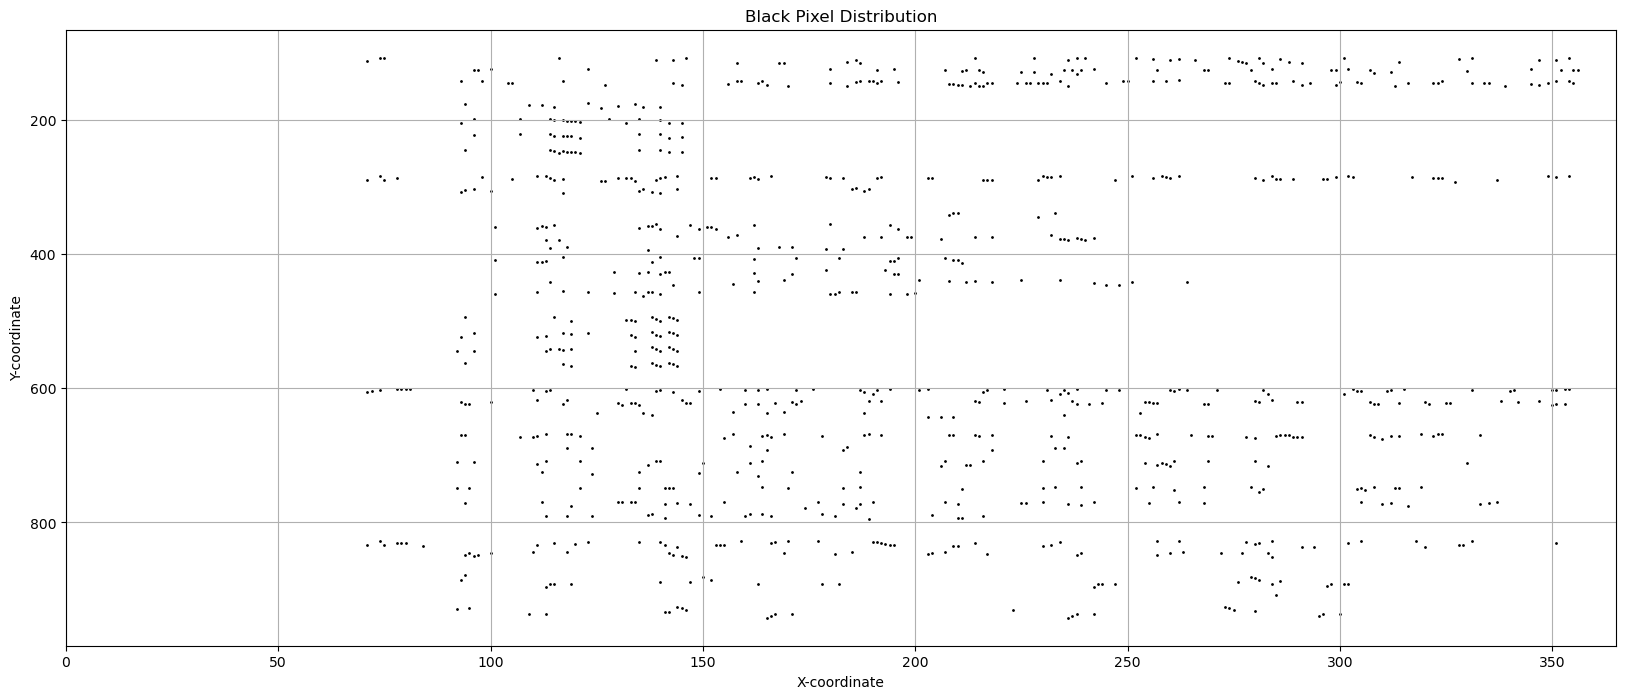

72


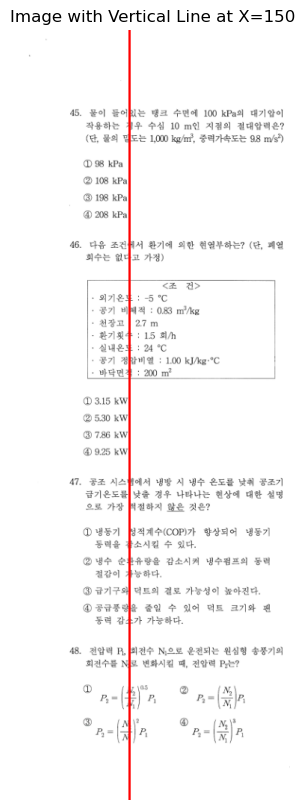

Detected (x, y) coordinates: [(150, 109), (150, 124), (150, 149), (150, 285), (150, 300), (150, 335), (150, 355), (150, 390), (150, 405), (150, 422), (150, 441), (150, 457), (150, 467), (150, 602), (150, 639), (150, 672), (150, 686), (150, 707), (150, 726), (150, 787), (150, 849), (150, 881), (150, 895), (150, 931), (150, 941), (150, 951)]


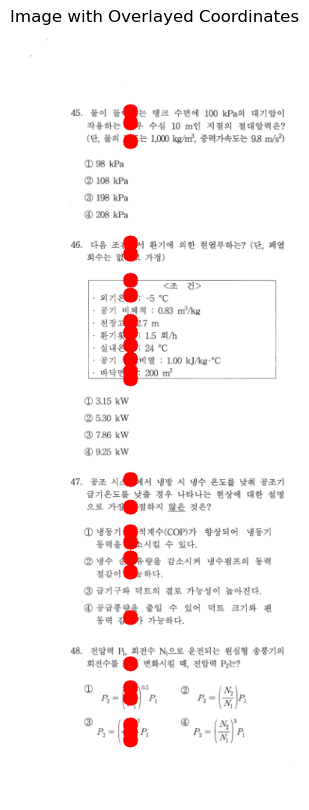

Skipping crop region with insufficient height: (130, 99, 365, 114)
Skipping crop region with insufficient height: (130, 114, 365, 139)
Cropped image saved: cropped_images\cropped_3.png


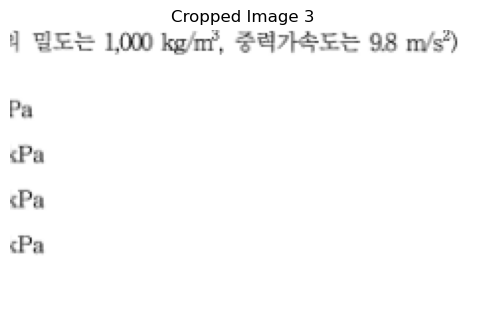

Skipping crop region with insufficient height: (130, 275, 365, 290)
Skipping crop region with insufficient height: (130, 290, 365, 325)
Skipping crop region with insufficient height: (130, 325, 365, 345)
Skipping crop region with insufficient height: (130, 345, 365, 380)
Skipping crop region with insufficient height: (130, 380, 365, 395)
Skipping crop region with insufficient height: (130, 395, 365, 412)
Skipping crop region with insufficient height: (130, 412, 365, 431)
Skipping crop region with insufficient height: (130, 431, 365, 447)
Skipping crop region with insufficient height: (130, 447, 365, 457)
Cropped image saved: cropped_images\cropped_13.png


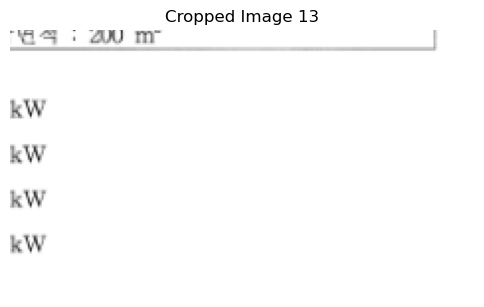

Skipping crop region with insufficient height: (130, 592, 365, 629)
Skipping crop region with insufficient height: (130, 629, 365, 662)
Skipping crop region with insufficient height: (130, 662, 365, 676)
Skipping crop region with insufficient height: (130, 676, 365, 697)
Skipping crop region with insufficient height: (130, 697, 365, 716)
Skipping crop region with insufficient height: (130, 716, 365, 777)
Skipping crop region with insufficient height: (130, 777, 365, 839)
Skipping crop region with insufficient height: (130, 839, 365, 871)
Skipping crop region with insufficient height: (130, 871, 365, 885)
Skipping crop region with insufficient height: (130, 885, 365, 921)
Skipping crop region with insufficient height: (130, 921, 365, 931)
Skipping crop region with insufficient height: (130, 931, 365, 941)
Skipping crop region with insufficient height: (130, 941, 365, 1032)


In [81]:
image_path = "C:/Users/user/Downloads/qcrop/original/converted_images/2024_pil_A_page_8_left.png"

#
# 이미지 변환 및 나누기 pdf to png + Division
#
import os
import fitz  # PyMuPDF
from PIL import Image

# PDF 경로 설정
pdf_path = "C:/Users/user/Downloads/qcrop/original/"
output_path = os.path.join(pdf_path, "converted_images")

# 출력 폴더 생성
os.makedirs(output_path, exist_ok=True)

# PDF 파일 목록 가져오기
pdf_files = [f for f in os.listdir(pdf_path) if f.endswith('.pdf')]

# PDF의 각 페이지를 세로 방향으로 절반 나누어 저장하는 함수
def convert_and_split_pdf_to_png(pdf_file, output_dir):
    pdf_document = fitz.open(pdf_file)
    for page_num in range(len(pdf_document)):
        page = pdf_document.load_page(page_num)
        pix = page.get_pixmap()

        # PIL 이미지를 사용해 세로로 나눔
        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        mid_x = pix.width // 2

        left_img = img.crop((0, 0, mid_x, pix.height))
        right_img = img.crop((mid_x, 0, pix.width, pix.height))

        base_filename = f"{os.path.splitext(os.path.basename(pdf_file))[0]}_page_{page_num + 1}"
        left_img.save(os.path.join(output_dir, f"{base_filename}_left.png"))
        right_img.save(os.path.join(output_dir, f"{base_filename}_right.png"))
    pdf_document.close()

# 변환 및 저장 실행
for pdf_file in pdf_files:
    pdf_full_path = os.path.join(pdf_path, pdf_file)
    convert_and_split_pdf_to_png(pdf_full_path, output_path)

print(f"PDF 파일을 PNG로 변환 및 세로로 나누는 작업 완료! 변환된 파일은 {output_path}에 저장되었습니다.")

#
# x타겟값 설정
#
import cv2
import matplotlib.pyplot as plt
import numpy as np

def analyze_black_pixel_distribution(image_path, threshold=100, skip=60):
    """
    Analyze black pixel distribution across all vertical lines (x-coordinates) of the image.

    Parameters:
        image_path (str): Path to the input image file.
        threshold (int): The intensity threshold to detect dark pixels.
        skip (int): Number of pixels to skip after detecting a dark pixel.

    Returns:
        dict: Dictionary where keys are x-coordinates, and values are lists of detected y-coordinates.
    """
    # Load the image in grayscale for intensity analysis
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Failed to load image.")
        return {}

    # Get image dimensions
    height, width = image.shape

    # Initialize dictionary to store results
    black_pixel_distribution = {}

    # Analyze each vertical line (x-coordinate)
    for x in range(width):
        vertical_line = image[:, x]
        y = 0
        y_coordinates = []

        while y < height:
            if vertical_line[y] < threshold:
                y_coordinates.append(y)
                y += skip
            else:
                y += 1

        if y_coordinates:
            black_pixel_distribution[x] = y_coordinates

    return black_pixel_distribution

def calculate_black_pixel_count(distribution):
    """
    Calculate the number of black pixels for each x-coordinate.

    Parameters:
        distribution (dict): Dictionary where keys are x-coordinates and values are lists of y-coordinates.

    Returns:
        dict: Dictionary where keys are x-coordinates and values are the count of black pixels.
    """
    return {x: len(y_coords) for x, y_coords in distribution.items()}

def find_x_target(pixel_counts, min_count=3, max_count=10):
    """
    Find the first x-coordinate where the black pixel count is within a specified range.

    Parameters:
        pixel_counts (dict): Dictionary where keys are x-coordinates and values are the count of black pixels.
        min_count (int): Minimum black pixel count.
        max_count (int): Maximum black pixel count.

    Returns:
        int: The first x-coordinate satisfying the condition, or -1 if not found.
    """
    for x, count in pixel_counts.items():
        if min_count <= count <= max_count:
            return x
    return -1

# Example usage
threshold = 100  # Intensity threshold for detecting dark pixels
skip = 20  # Number of pixels to skip after detection

# Analyze the image for black pixel distribution
black_pixel_distribution = analyze_black_pixel_distribution(image_path, threshold, skip)

# Calculate black pixel counts for each x-coordinate
black_pixel_count = calculate_black_pixel_count(black_pixel_distribution)

# Find the first x-coordinate satisfying the condition
x_target = find_x_target(black_pixel_count, min_count=2, max_count=10)

if x_target != -1:
    print(f"x_target is dynamically set to: {x_target}")
else:
    print("No x-coordinate satisfies the condition.")

# Plot the distribution
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is not None:
    def plot_black_pixel_distribution(distribution, image_width):
        plt.figure(figsize=(20, 8))
        for x, y_coords in distribution.items():
            plt.scatter([x] * len(y_coords), y_coords, s=1, color="black")
        plt.gca().invert_yaxis()
        plt.title("Black Pixel Distribution")
        plt.xlabel("X-coordinate")
        plt.ylabel("Y-coordinate")
        plt.xlim(0, image_width)
        plt.grid(True)
        plt.show()
    plot_black_pixel_distribution(black_pixel_distribution, image.shape[1])
x_target += 1
print(x_target)

x_target=150


#
# x target 값 이미지 상 위치 확인
#

def overlay_x_line(image_path, x_target, output_path="output_with_x_line.png"):
    """
    Overlay a vertical line at a specific x-coordinate on the image.

    Parameters:
        image_path (str): Path to the input image file.
        x_target (int): The x-coordinate where the line will be overlaid.
        output_path (str): Path to save the output image with the overlay.

    Returns:
        None
    """
    image = cv2.imread(image_path)
    if image is None:
        print("Failed to load image.")
        return

    line_color = (0, 0, 255)
    line_thickness = 2
    image_with_line = cv2.line(image, (x_target, 0), (x_target, image.shape[0]), line_color, line_thickness)
    cv2.imwrite(output_path, image_with_line)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image_with_line, cv2.COLOR_BGR2RGB))
    plt.title(f"Image with Vertical Line at X={x_target}")
    plt.axis("off")
    plt.show()

# Example usage
overlay_x_line(image_path, x_target)


#
# 실제 좌표값 찍음
#
import cv2
import matplotlib.pyplot as plt


#이미지에서 특정 x-좌표를 기준으로 y-축을 따라 픽셀의 밝기를 분석하고, 어두운 픽셀을 찾은 후 이를 (x, y) 좌표로 저장
def analyze_and_store_coordinates(image_path, x_target, threshold=100, skip=60):
    """
    Analyze pixels along the y-axis for a given x-coordinate in an image,
    storing detected coordinates after skipping a defined number of pixels.

    Parameters:
        image_path (str): Path to the input image file.
        x_target (int): The x-coordinate to analyze.
        threshold (int): The intensity threshold to detect dark pixels.
        skip (int): Number of pixels to skip after detecting a dark pixel.

    Returns:
        list: Detected (x, y) coordinates of dark pixels.
    """
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale for intensity analysis
    if image is None:
        print("Failed to load image.")
        return []

    # Extract the pixel intensities along the y-axis at x_target
    vertical_line = image[:, x_target]

    # Initialize variables
    coordinates = []  # List to store detected (x, y) positions
    y = 0  # Start from the top of the image

    while y < len(vertical_line):
        if vertical_line[y] < threshold:
            # Dark pixel detected, add its (x, y) position
            coordinates.append((x_target, y))
            # Skip the next `skip` pixels
            y += skip
        else:
            # Move to the next pixel
            y += 1

    return coordinates


#analyze_and_store_coordinates 함수로부터 받은 좌표들을 이미지 위에 표시
def overlay_coordinates(image_path, coordinates, output_path="output_with_coordinates.png"):
    """
    Overlay specified coordinates on the image.

    Parameters:
        image_path (str): Path to the input image file.
        coordinates (list of tuples): List of (x, y) coordinates to overlay.
        output_path (str): Path to save the output image with the overlay.

    Returns:
        None
    """
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        print("Failed to load image.")
        return

    # Overlay each coordinate as a circle on the image
    for (x, y) in coordinates:
        # Draw a circle at each (x, y) coordinate (BGR color: red)
        circle_color = (0, 0, 255)  # Red color in BGR
        circle_radius = 10
        circle_thickness = -1  # Filled circle
        cv2.circle(image, (x, y), circle_radius, circle_color, circle_thickness)

    # Save the output image with the overlay
    cv2.imwrite(output_path, image)

    # Display the image with the overlay
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Image with Overlayed Coordinates")
    plt.axis("off")
    plt.show()


# Example usage
threshold = 200  # Intensity threshold for detecting dark pixels
skip = 10  # Number of pixels to skip after detection

# Analyze the image and store the detected coordinates
coordinates = analyze_and_store_coordinates(image_path, x_target, threshold, skip)

# Print detected coordinates
print("Detected (x, y) coordinates:", coordinates)

# Overlay the detected coordinates on the image
overlay_coordinates(image_path, coordinates)


#
# 문제 크롭 실행
#



import cv2
import os
import matplotlib.pyplot as plt

def crop_image_by_coordinates(image_path, coordinates, output_folder="cropped_images"):
    """
    Crop the image based on a list of coordinates and save the cropped parts,
    while also displaying the cropped images.

    Parameters:
        image_path (str): Path to the input image file.
        coordinates (list of tuples): List of (x, y) coordinates for cropping.
        output_folder (str): Folder to save the cropped images.

    Returns:
        None
    """
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        print("Failed to load image.")
        return

    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Get image dimensions
    height, width, _ = image.shape

    # Process each coordinate and crop the image
    for i, (x, y) in enumerate(coordinates):
        # Determine the cropping box
        x_start = x  # Crop from the x-coordinate
        y_start = y  # Crop from the y-coordinate
        x_end = width  # Always crop to the full width
        y_end = height if i == len(coordinates) - 1 else coordinates[i + 1][1]  # Next y or full height

        # Ensure cropping coordinates are within image boundaries
        x_start = max(0, min(x_start, width))
        x_end = max(0, min(x_end, width))
        y_start = max(0, min(y_start, height))
        y_end = max(0, min(y_end, height))

        # Check if the cropping box is valid and meets the height condition
        crop_height = y_end - y_start
        if y_start >= y_end or x_start >= x_end:
            print(f"Skipping invalid crop region: ({x_start}, {y_start}, {x_end}, {y_end})")
            continue
        if crop_height < 100:  # Add the height condition
            print(f"Skipping crop region with insufficient height: ({x_start}, {y_start}, {x_end}, {y_end})")
            continue

        # Crop the image
        cropped_image = image[y_start:y_end, x_start:x_end]

        # Save the cropped image
        output_path = os.path.join(output_folder, f"cropped_{i + 1}.png")
        cv2.imwrite(output_path, cropped_image)

        print(f"Cropped image saved: {output_path}")

        # Display the cropped image
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Cropped Image {i + 1}")
        plt.axis("off")
        plt.show()


def modify_coordinates(coordinates):
    return [(x - 20, y - 10) for x, y in coordinates]

# Example usage
new_coordinates = modify_coordinates(coordinates)
crop_image_by_coordinates(image_path, new_coordinates)

In [63]:
import os
print("Current working directory:", os.getcwd())


Current working directory: c:\Users\user\Downloads


PDF 파일을 PNG로 변환 및 세로로 나누는 작업 완료! 변환된 파일은 C:/Users/user/Downloads/qcrop/original/converted_images에 저장되었습니다.


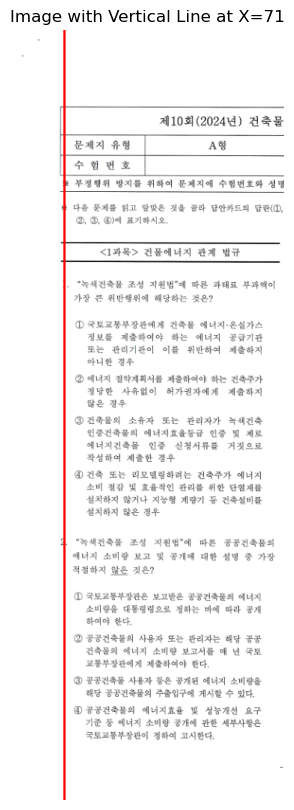

Detected (x, y) coordinates: [(71, 140), (71, 216), (71, 240), (71, 284), (71, 309), (71, 336), (71, 683)]


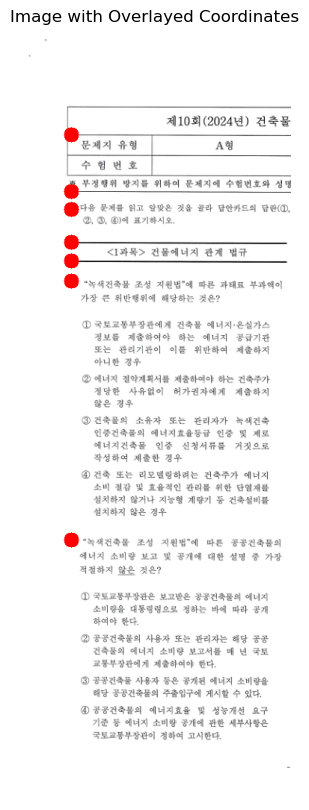

x = 66: 4 black pixels
x = 67: 5 black pixels
x = 68: 5 black pixels
x = 69: 4 black pixels
x = 70: 6 black pixels
x = 71: 7 black pixels
x = 72: 4 black pixels
x = 73: 5 black pixels
x = 74: 5 black pixels
x = 75: 4 black pixels
x = 76: 4 black pixels
x = 77: 4 black pixels
x = 78: 4 black pixels
x = 79: 4 black pixels
x = 80: 4 black pixels
x = 81: 4 black pixels
x = 82: 4 black pixels
x = 83: 4 black pixels
x = 84: 4 black pixels
x = 85: 5 black pixels
x = 86: 4 black pixels
x = 87: 4 black pixels
x = 88: 5 black pixels
x = 89: 8 black pixels
x = 90: 9 black pixels
x = 91: 9 black pixels
x = 92: 5 black pixels
x = 93: 5 black pixels
x = 94: 5 black pixels
x = 95: 4 black pixels
x = 96: 5 black pixels
x = 97: 5 black pixels
x = 98: 4 black pixels
x = 99: 5 black pixels
x = 100: 3 black pixels
x = 101: 3 black pixels
x = 102: 3 black pixels
x = 103: 6 black pixels
x = 104: 5 black pixels
x = 105: 5 black pixels
x = 106: 4 black pixels
x = 107: 6 black pixels
x = 108: 7 black pixels
x 

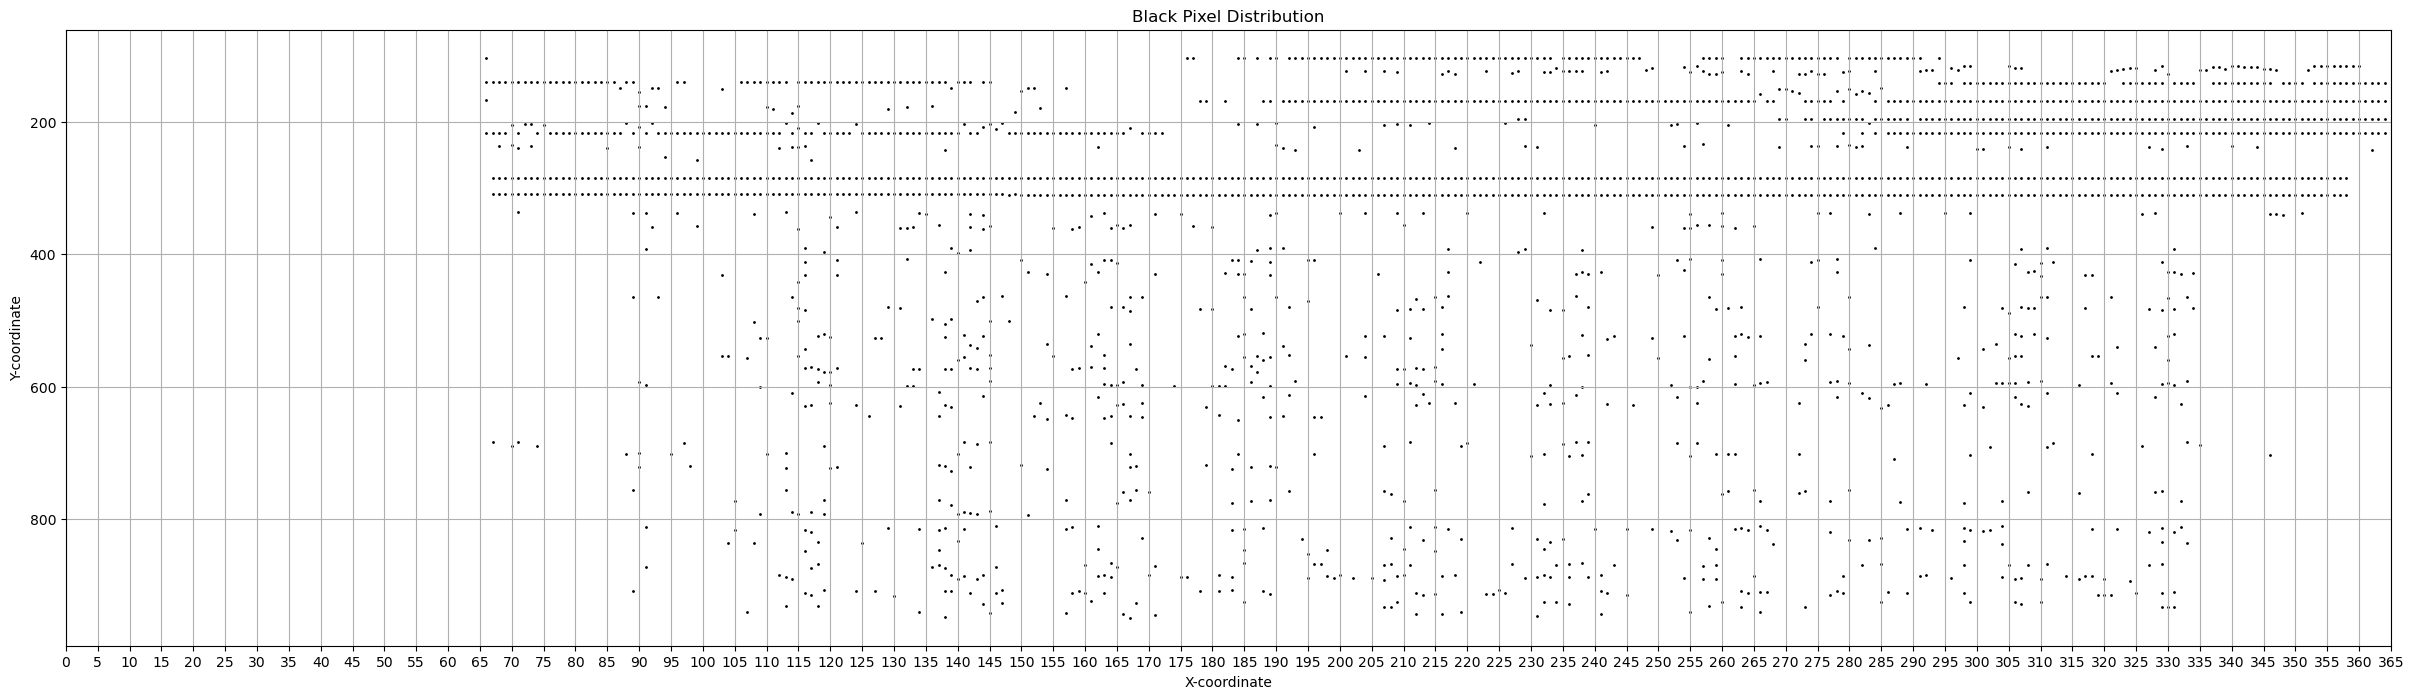

Cropped image saved: cropped_images\cropped_1.png


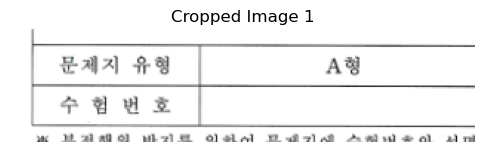

Cropped image saved: cropped_images\cropped_2.png


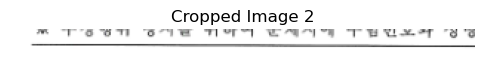

Cropped image saved: cropped_images\cropped_3.png


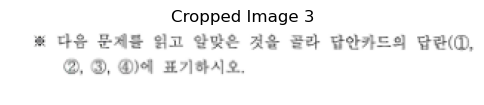

Cropped image saved: cropped_images\cropped_4.png


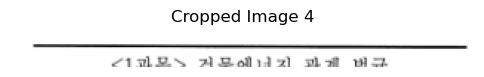

Cropped image saved: cropped_images\cropped_5.png


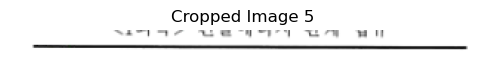

Cropped image saved: cropped_images\cropped_6.png


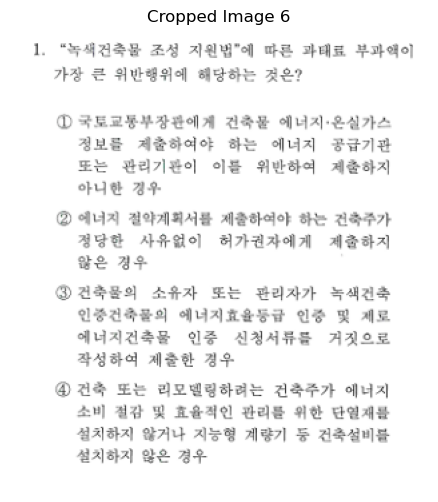

Cropped image saved: cropped_images\cropped_7.png


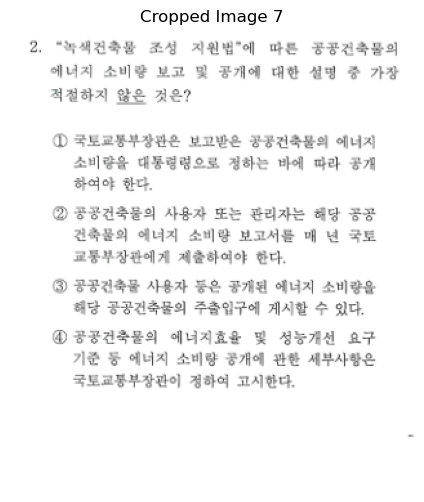

Skipping crop region with insufficient height: (51, 130, 365, 206)
Skipping crop region with insufficient height: (51, 206, 365, 230)
Skipping crop region with insufficient height: (51, 230, 365, 274)
Skipping crop region with insufficient height: (51, 274, 365, 299)
Skipping crop region with insufficient height: (51, 299, 365, 326)
Cropped image saved: cropped_images\cropped_6.png


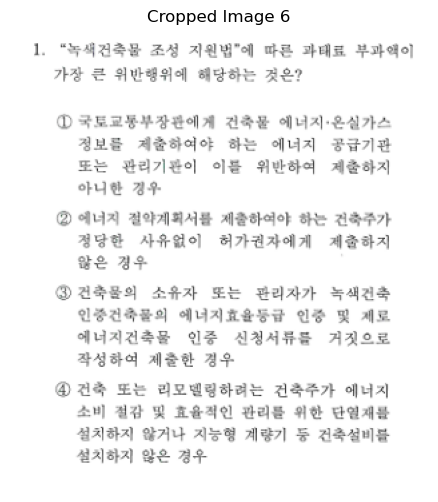

Cropped image saved: cropped_images\cropped_7.png


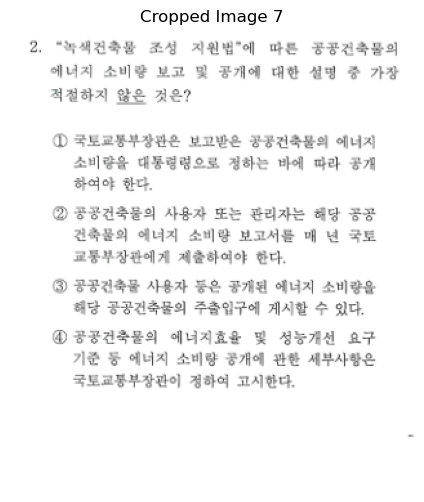

In [1]:
# 예제 이미지 경로
image_path = r"C:\Users\user\Downloads\problems\page_14_left.png"
# detect_black_pixels(image_path)


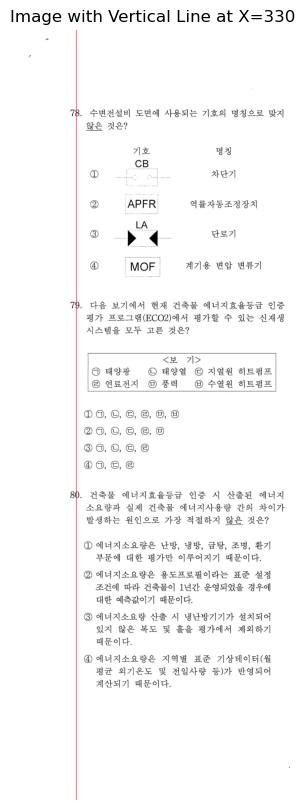

In [2]:
import cv2
import matplotlib.pyplot as plt

def overlay_x_line(image_path, x_target, output_path="output_with_x_line.png"):
    """
    Overlay a vertical line at a specific x-coordinate on the image.

    Parameters:
        image_path (str): Path to the input image file.
        x_target (int): The x-coordinate where the line will be overlaid.
        output_path (str): Path to save the output image with the overlay.

    Returns:
        None
    """
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        print("Failed to load image.")
        return

    # Add a vertical line at x_target (BGR color: red)
    line_color = (0, 0, 255)  # Red color in BGR
    line_thickness = 2
    image_with_line = cv2.line(image, (x_target, 0), (x_target, image.shape[0]), line_color, line_thickness)

    # Save the output image with the overlay
    cv2.imwrite(output_path, image_with_line)

    # Display the image with the overlay
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image_with_line, cv2.COLOR_BGR2RGB))
    plt.title(f"Image with Vertical Line at X={x_target}")
    plt.axis("off")
    plt.show()

# Example usage
x_target = 330  # Example x-coordinate to overlay the line
overlay_x_line(image_path, x_target)


Cropped image saved: cropped_images\cropped_1.png


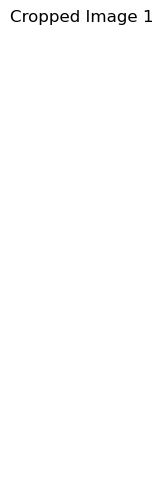

Cropped image saved: cropped_images\cropped_2.png


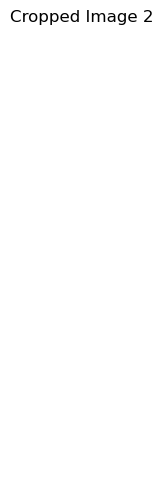

Cropped image saved: cropped_images\cropped_3.png


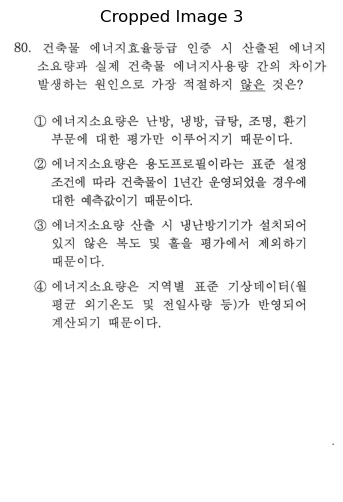

In [6]:
import cv2
import os
import matplotlib.pyplot as plt

def crop_image_by_coordinates(image_path, coordinates, output_folder="cropped_images"):
    """
    Crop the image based on a list of coordinates and save the cropped parts,
    with x and y values reduced by 50 pixels for each cropping.

    Parameters:
        image_path (str): Path to the input image file.
        coordinates (list of tuples): List of (x, y) coordinates for cropping.
        output_folder (str): Folder to save the cropped images.

    Returns:
        None
    """
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        print("Failed to load image.")
        return

    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Get image dimensions
    height, width, _ = image.shape

    # Process each coordinate and crop the image
    for i, (x, y) in enumerate(coordinates):
        # Adjust cropping box by reducing 50 pixels from x and y
        x_start = max(0, x - 50)  # Ensure it's not less than 0
        y_start = max(0, y - 50)  # Ensure it's not less than 0
        x_end = width if i == len(coordinates) - 1 else min(width, coordinates[i + 1][0] - 35)
        y_end = height if i == len(coordinates) - 1 else min(height, coordinates[i + 1][1] - 10)

        # Ensure cropping coordinates are valid
        if y_start >= y_end or x_start >= x_end:
            print(f"Skipping invalid crop region: ({x_start}, {y_start}, {x_end}, {y_end})")
            continue

        # Crop the image
        cropped_image = image[y_start:y_end, x_start:x_end]

        # Save the cropped image
        output_path = os.path.join(output_folder, f"cropped_{i + 1}.png")
        cv2.imwrite(output_path, cropped_image)

        print(f"Cropped image saved: {output_path}")

        # Display cropped region
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Cropped Image {i + 1}")
        plt.axis("off")
        plt.show()

crop_image_by_coordinates(image_path, coordinates)
